**This code is part of a year-long project. All of the current code in this document is used for descriptive analysis of our dataset**

## Current Goals
Find loyal customers that frequently and consistantly put in orders based on dow and hour_of_day, as well as track how much of their orders are reorders

In [1]:
import collections
import itertools
import pathlib
import random
import sqlite3
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data_loc = pathlib.Path.cwd().parent
os.chdir(data_loc)
data_loc = pathlib.Path.cwd().parent
os.chdir(data_loc)

In [3]:
pathlib.Path.cwd()

WindowsPath('C:/Users/rider/OneDrive/Documents/Capstone Project')

In [4]:
def run_db_query(db_filepath, query):
    
    with sqlite3.Connection(db_filepath) as conn:
    
        cur = conn.cursor()
        cur.execute(query)
        results = cur.fetchall()
    conn.close()
    
    return results

In [5]:
db_path = pathlib.Path('instacart.db')
query = "SELECT name FROM sqlite_master WHERE type='table'"
run_db_query(db_path, query)

[('products',), ('aisles',), ('departments',), ('order_details',), ('orders',)]

In [6]:
query = "select sql from sqlite_master where type = 'table';"
query_result = run_db_query(db_path, query)
for table_spec in query_result:
    print(table_spec[0])
    print('*'*60)

CREATE TABLE "products" (
"product_id" INTEGER PRIMARY KEY,
  "product_name" TEXT,
  "aisle_id" INTEGER,
  "department_id" INTEGER
)
************************************************************
CREATE TABLE "aisles" (
"aisle_id" INTEGER PRIMARY KEY,
  "aisle" TEXT
)
************************************************************
CREATE TABLE "departments" (
"department_id" INTEGER PRIMARY KEY,
  "department" TEXT
)
************************************************************
CREATE TABLE "order_details" (
"id" INTEGER PRIMARY KEY,
  "order_id" INTEGER,
  "product_id" INTEGER,
  "add_to_cart_order" INTEGER,
  "reordered" INTEGER
)
************************************************************
CREATE TABLE "orders" (
"order_id" INTEGER PRIMARY KEY,
  "user_id" INTEGER,
  "order_number" INTEGER,
  "order_dow" INTEGER,
  "order_hour_of_day" INTEGER,
  "days_since_prior_order" REAL
)
************************************************************


In [324]:
statement = 'SELECT * from products where department_id == 17;'

conn = sqlite3.Connection(db_path)
household = pd.read_sql(statement, conn)
conn.close()

household.head(20)

,product_id,product_name,aisle_id,department_id
0,14,Fresh Scent Dishwasher Cleaner,74,17
1,48,"School Glue, Washable, No Run",87,17
2,57,Flat Toothpicks,111,17
3,71,Ultra 7 Inch Polypropylene Traditional Plates,111,17
4,105,"Easy Grab 9\""x13\"" Oblong Glass Bakeware",10,17
5,111,"Fabric Softener, Geranium Scent",75,17
6,134,Stain Release Boost In-Wash Stain Remover Pacs,75,17
7,153,Fabric Refresher Meadows & Rain Air Freshener ...,75,17
8,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
9,204,Free & Clear Natural Laundry Detergent For Sen...,75,17


In [322]:
statement = 'SELECT * from departments;'

conn = sqlite3.Connection(db_path)
deparments = pd.read_sql(statement, conn)
conn.close()

deparments.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [325]:
statement = 'SELECT * from products where department_id = 21;'

conn = sqlite3.Connection(db_path)
missing = pd.read_sql(statement, conn)
conn.close()

missing

,product_id,product_name,aisle_id,department_id
0,38,Ultra Antibacterial Dish Liquid,100,21
1,72,Organic Honeycrisp Apples,100,21
2,110,Uncured Turkey Bologna,100,21
3,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
4,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
1253,49553,Organic Plain Skyr,100,21
1254,49575,Chocolate Vanilla Malt Custard,100,21
1255,49641,"8\"" Pecan Pie",100,21
1256,49664,Lemon Cayenne Drinking Vinegar,100,21


In [7]:
statement = 'SELECT * from orders;'

conn = sqlite3.Connection(db_path)
orders = pd.read_sql(statement, conn)
conn.close()

orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,202279,3,5,9,8.0
1,3,205970,16,5,17,12.0
2,4,178520,36,1,9,7.0
3,5,156122,42,6,16,9.0
4,6,22352,4,1,12,30.0


In [8]:
DSPO_groupby_columns = [
    'user_id'    
]

DSPO_agg_dict = {
    'days_since_prior_order': ['sum'],
    'order_number': ['count']
}
totaltimepurchases = orders.groupby(DSPO_groupby_columns).agg(DSPO_agg_dict)
totaltimepurchases.columns = ['total_time_between_orders', 'number_of_orders']
totaltimepurchases[['total_time_between_orders', 'number_of_orders']] = totaltimepurchases[['total_time_between_orders', 'number_of_orders']].apply(pd.to_numeric)
totaltimepurchases['average_time_between_orders'] = totaltimepurchases['total_time_between_orders'] / totaltimepurchases['number_of_orders']
totaltimepurchases.sort_values(['total_time_between_orders'], ascending=[False]).head()
totaltimepurchases = totaltimepurchases.reset_index()
totaltimepurchases.head()

,user_id,total_time_between_orders,number_of_orders,average_time_between_orders
0,1,176.0,10,17.600000
1,2,198.0,14,14.142857
2,3,133.0,12,11.083333
3,4,55.0,5,11.000000
4,5,40.0,4,10.000000


In [9]:
loyalcustomers = totaltimepurchases[totaltimepurchases['number_of_orders'] >= 10]
loyalcustomers = loyalcustomers[loyalcustomers['average_time_between_orders'] <= 16]
loyalcustomers.sort_values(by='number_of_orders', ascending=False)
#loyalcustomers.columns = ['user_id', 'total_orders']
#loyalcustomers.reset_index()
loyalcustomers.head()
#loyalcustomers.shape
#loyalcustomers.number_of_orders.sum()
# loyalcustomerslist = loyalcustomers['order_id'].to_list()

,user_id,total_time_between_orders,number_of_orders,average_time_between_orders
1,2,198.0,14,14.142857
2,3,133.0,12,11.083333
6,7,203.0,20,10.150000
12,13,84.0,12,7.000000
14,15,227.0,22,10.318182


In [10]:
# 206,209 different customers


# totalcustomerorders = orders.groupby('user_id', as_index=False)['order_number'].count()
# totalcustomerorders = totalcustomerorders[totalcustomerorders['order_number'] >= 20]
# totalcustomerorders.sort_values(by='order_number', ascending=False)
# totalcustomerorders.columns = ['user_id', 'total_orders']
# totalcustomerorders.head()

In [11]:
loyalcustomerorders = pd.merge(loyalcustomers, orders, on=['user_id'], how='left')
loyalcustomerorderslist = loyalcustomerorders['order_id'].to_list()
loyalcustomerorders

# loyalcustomerorderslist = set(loyalcustomerorderslist)

,user_id,total_time_between_orders,number_of_orders,average_time_between_orders,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,198.0,14,14.142857,738281,4,2,10,8.0
1,2,198.0,14,14.142857,788338,8,1,15,27.0
2,2,198.0,14,14.142857,839880,14,3,10,13.0
3,2,198.0,14,14.142857,1199898,6,2,9,13.0
4,2,198.0,14,14.142857,1402090,11,1,10,30.0
...,...,...,...,...,...,...,...,...,...
2448130,206208,357.0,49,7.285714,3128968,23,5,16,4.0
2448131,206208,357.0,49,7.285714,3292671,45,2,11,3.0
2448132,206208,357.0,49,7.285714,3356245,40,5,9,10.0
2448133,206208,357.0,49,7.285714,3392839,3,2,15,7.0


In [12]:
saturdayOrders = orders[orders['order_dow'] == 0]
sundayOrders = orders[orders['order_dow'] == 1]
mondayOrders = orders[orders['order_dow'] == 2]
tuesdayOrders = orders[orders['order_dow'] == 3]
wednesdayOrders = orders[orders['order_dow'] == 4]
thursdayOrders = orders[orders['order_dow'] == 5]
fridayOrders = orders[orders['order_dow'] == 6]

saturdayOrders = saturdayOrders.groupby('user_id', as_index=False)['order_number'].count()
sundayOrders = sundayOrders.groupby('user_id', as_index=False)['order_number'].count()
mondayOrders = mondayOrders.groupby('user_id', as_index=False)['order_number'].count()
tuesdayOrders = tuesdayOrders.groupby('user_id', as_index=False)['order_number'].count()
wednesdayOrders = wednesdayOrders.groupby('user_id', as_index=False)['order_number'].count()
thursdayOrders = thursdayOrders.groupby('user_id', as_index=False)['order_number'].count()
fridayOrders = fridayOrders.groupby('user_id', as_index=False)['order_number'].count()

totalOrders = orders.groupby('user_id', as_index=False)['order_number'].count()
totalOrders = totalOrders[totalOrders['order_number'] >= 20]

In [13]:
totalOrders['totalOrders'] = totalOrders['order_number']
totalOrders=totalOrders.drop(labels='order_number',axis=1)

saturdayOrders['totalSaturdayOrders'] = saturdayOrders['order_number']
saturdayOrders=saturdayOrders.drop(labels='order_number',axis=1)

sundayOrders['totalSundayOrders'] = sundayOrders['order_number']
sundayOrders=sundayOrders.drop(labels='order_number',axis=1)

mondayOrders['totalMondayOrders'] = mondayOrders['order_number']
mondayOrders=mondayOrders.drop(labels='order_number',axis=1)

tuesdayOrders['totalTuesdayOrders'] = tuesdayOrders['order_number']
tuesdayOrders=tuesdayOrders.drop(labels='order_number',axis=1)

wednesdayOrders['totalWednesdayOrders'] = wednesdayOrders['order_number']
wednesdayOrders=wednesdayOrders.drop(labels='order_number',axis=1)

thursdayOrders['totalThursdayOrders'] = thursdayOrders['order_number']
thursdayOrders=thursdayOrders.drop(labels='order_number',axis=1)

fridayOrders['totalFridayOrders'] = fridayOrders['order_number']
fridayOrders=fridayOrders.drop(labels='order_number',axis=1)

In [14]:
test = totalOrders.merge(saturdayOrders, on='user_id', how='left')
test = test.merge(sundayOrders, on='user_id', how='left')
test = test.merge(mondayOrders, on='user_id', how='left')
test = test.merge(tuesdayOrders, on='user_id', how='left')
test = test.merge(wednesdayOrders, on='user_id', how='left')
test = test.merge(thursdayOrders, on='user_id', how='left')
test = test.merge(fridayOrders, on='user_id', how='left')
test = test.fillna(value=0)

In [15]:
test.sort_values('user_id')

,user_id,totalOrders,totalSaturdayOrders,totalSundayOrders,totalMondayOrders,totalTuesdayOrders,totalWednesdayOrders,totalThursdayOrders,totalFridayOrders
0,7,20,6.0,5.0,2.0,4.0,0.0,2.0,1.0
1,15,22,0.0,10.0,6.0,0.0,1.0,3.0,2.0
2,17,40,3.0,8.0,5.0,5.0,5.0,7.0,7.0
3,21,33,0.0,17.0,5.0,5.0,1.0,5.0,0.0
4,27,81,0.0,17.0,21.0,17.0,12.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...
50726,206200,23,1.0,10.0,3.0,1.0,1.0,4.0,3.0
50727,206201,32,6.0,4.0,1.0,3.0,6.0,5.0,7.0
50728,206202,22,4.0,4.0,3.0,4.0,6.0,1.0,0.0
50729,206206,67,18.0,8.0,7.0,11.0,12.0,3.0,8.0


In [16]:
#Keep order data frequency above a certain percentage (possibly 25%)

In [17]:
thirtypct = test.copy()
thirtypct['totalSaturdayOrders'] = thirtypct['totalSaturdayOrders'] / thirtypct['totalOrders']
thirtypct['totalSundayOrders'] = thirtypct['totalSundayOrders'] / thirtypct['totalOrders']
thirtypct['totalMondayOrders'] = thirtypct['totalMondayOrders'] / thirtypct['totalOrders']
thirtypct['totalTuesdayOrders'] = thirtypct['totalTuesdayOrders'] / thirtypct['totalOrders']
thirtypct['totalWednesdayOrders'] = thirtypct['totalWednesdayOrders'] / thirtypct['totalOrders']
thirtypct['totalThursdayOrders'] = thirtypct['totalThursdayOrders'] / thirtypct['totalOrders']
thirtypct['totalFridayOrders'] = thirtypct['totalFridayOrders'] / thirtypct['totalOrders']
thirtypct.head(10)

,user_id,totalOrders,totalSaturdayOrders,totalSundayOrders,totalMondayOrders,totalTuesdayOrders,totalWednesdayOrders,totalThursdayOrders,totalFridayOrders
0,7,20,0.300000,0.250000,0.100000,0.200000,0.000000,0.100000,0.050000
1,15,22,0.000000,0.454545,0.272727,0.000000,0.045455,0.136364,0.090909
2,17,40,0.075000,0.200000,0.125000,0.125000,0.125000,0.175000,0.175000
3,21,33,0.000000,0.515152,0.151515,0.151515,0.030303,0.151515,0.000000
4,27,81,0.000000,0.209877,0.259259,0.209877,0.148148,0.172840,0.000000
5,28,24,0.291667,0.208333,0.208333,0.083333,0.041667,0.166667,0.000000
6,31,20,0.250000,0.100000,0.150000,0.300000,0.100000,0.100000,0.000000
7,36,37,0.243243,0.054054,0.027027,0.189189,0.216216,0.162162,0.108108
8,37,23,0.086957,0.130435,0.130435,0.130435,0.086957,0.217391,0.217391
9,50,67,0.074627,0.223881,0.208955,0.179104,0.089552,0.089552,0.134328


## Avg Orders per Customer

In [18]:
# test_loyalcustomerorderslist = loyalcustomerorderslist
# conector = sqlite3.connect("instacart.db")
# cursor = conector.cursor()
# parameterized_query = cursor.execute(
# "SELECT * FROM order_details WHERE order_id=?", (test_loyalcustomerorderslist)
# )
# for row in parameterized_query:
#     print(row)

In [19]:
statement = f"SELECT * FROM order_details WHERE order_id IN {tuple(loyalcustomerorderslist)};"
with sqlite3.Connection(db_path) as conn:
    orderdetails = pd.read_sql(statement, conn)
conn.close()

orderdetails.head()

,id,order_id,product_id,add_to_cart_order,reordered
0,9,3,33754,1,1
1,10,3,24838,2,1
2,11,3,17704,3,1
3,12,3,21903,4,1
4,13,3,17668,5,1


In [20]:
OD_groupby_columns = [
    'order_id'    
]

OD_agg_dict = {
    'product_id': ['count'],
}
itemspurchased = orderdetails.groupby(OD_groupby_columns).agg(OD_agg_dict)
itemspurchased.head()

,product_id
,count
order_id,
3,8
4,13
5,26
7,2
8,1


## Clustering

In [24]:
statement = f"""
SELECT 
orders.order_id, orders.user_id, orders.order_number,
orders.order_dow, orders.order_hour_of_day, orders.days_since_prior_order,
order_details.product_id, order_details.add_to_cart_order, 
order_details.reordered, products.product_name, departments.department
FROM orders 
INNER JOIN order_details on orders.order_id = order_details.order_id
INNER JOIN products on products.product_id = order_details.product_id
INNER JOIN departments on products.aisle_id = departments.department_id
WHERE orders.order_id in {tuple(loyalcustomerorderslist)};"""

conn = sqlite3.Connection(db_path)
loyal_orders = pd.read_sql(statement, conn)
conn.close()

loyal_orders.shape

(2681564, 11)

In [25]:
loyal_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department
0,4,178520,36,1,9,7.0,26434,2,1,Honey/Lemon Cough Drops,personal care
1,4,178520,36,1,9,7.0,39758,3,1,Chewy 25% Low Sugar Chocolate Chip Granola,bakery
2,5,156122,42,6,16,9.0,47329,3,1,Fresh Fruit Salad,frozen
3,5,156122,42,6,16,9.0,6348,10,1,Mini Original Babybel Cheese,missing
4,5,156122,42,6,16,9.0,40878,11,1,Macaroni And Cheese,produce


In [26]:
user_departments = loyal_orders.groupby(['user_id', 'department'])['product_id'].count().reset_index()
user_departments['total'] = user_departments.groupby('user_id')['product_id'].transform('sum')
user_departments['proportion'] = user_departments['product_id']/user_departments['total']
user_departments = user_departments.pivot(
    index='user_id',
    columns='department',
    values='proportion',
)
user_departments = user_departments.fillna(0)
user_departments

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.0,0.375000,0.000000,0.062500,0.0,0.000000,0.000000,0.062500,0.000000,0.062500,0.125000,0.000000,0.000000,0.312500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.0,0.363636,0.000000
7,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.000000,0.090909,0.181818,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.0,0.000000,0.000000
13,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
17,0.148148,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.481481,0.000000,0.000000,0.185185,0.000000,0.000000,0.000000,0.0,0.185185,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206201,0.041667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,0.062500,0.000000,0.125000,0.000000,0.062500,0.291667,0.145833,0.000000,0.020833,0.0,0.125000,0.062500
206202,0.000000,0.0,0.000000,0.000000,0.846154,0.0,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
206206,0.000000,0.0,0.269231,0.000000,0.000000,0.0,0.000000,0.269231,0.000000,0.000000,0.000000,0.153846,0.038462,0.000000,0.115385,0.115385,0.000000,0.000000,0.0,0.038462,0.000000


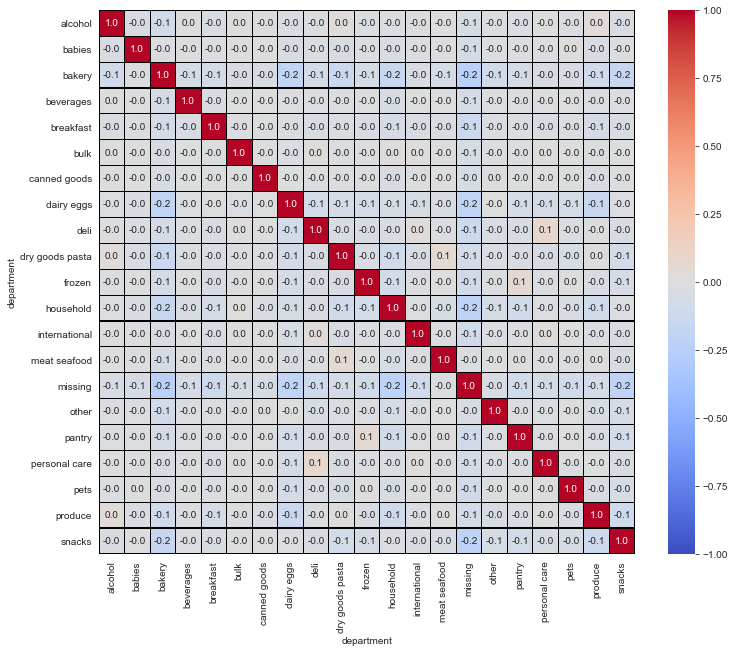

In [27]:
department_corr = user_departments.corr()

fig, ax =plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    department_corr,
    linewidths=0.1,
    linecolor='k',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
)

plt.show()

In [28]:
department_corr_long = department_corr.unstack()
department_corr_long.index.names = ['department1', 'department2']
department_corr_long = department_corr_long.reset_index()
department_corr_long = department_corr_long.rename(columns={0: 'correlation'})

my_filter = ((department_corr_long['department1'] != department_corr_long['department2'])
             & (department_corr_long['department1'] < department_corr_long['department2']))

In [29]:
department_corr_long[my_filter].nlargest(10, 'correlation')

,department1,department2,correlation
185,deli,personal care,0.074484
226,frozen,pantry,0.055426
202,dry goods pasta,meat seafood,0.054302
19,alcohol,produce,0.033850
180,deli,international,0.027857
9,alcohol,dry goods pasta,0.023974
269,international,personal care,0.021645
113,bulk,deli,0.014810
116,bulk,household,0.013099
208,dry goods pasta,produce,0.011585


In [30]:
department_corr_long[my_filter].nsmallest(10, 'correlation')

,department1,department2,correlation
56,bakery,missing,-0.245624
245,household,missing,-0.222873
314,missing,snacks,-0.208591
161,dairy eggs,missing,-0.200220
49,bakery,dairy eggs,-0.188746
62,bakery,snacks,-0.161631
53,bakery,household,-0.152992
51,bakery,dry goods pasta,-0.136909
166,dairy eggs,produce,-0.134542
98,breakfast,missing,-0.118601


In [31]:
user_df = user_departments.copy().reset_index()

user_orders = loyal_orders.groupby('user_id')['order_id'].nunique().to_dict()
products_per_order_and_user = loyal_orders.groupby(['user_id', 'order_number'])['product_id'].nunique().reset_index()
user_basket_size = products_per_order_and_user.groupby('user_id')['product_id'].mean().to_dict()

user_df['num_orders'] = user_df['user_id'].map(user_orders)
user_df['basket_size'] = user_df['user_id'].map(user_basket_size)

user_df.columns = [col for col in user_df.columns]
user_df = user_df.set_index('user_id')

user_df.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,num_orders,basket_size
user_id,,,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.0,0.375,0.0,0.0625,0.0,0.0,0.000000,0.0625,0.000000,0.062500,0.125000,0.0,0.0,0.312500,0.0,0.000000,0.0,0.0,0.000000,0.0,7,2.285714
3,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.454545,0.0,0.181818,0.0,0.0,0.363636,0.0,8,1.375000
7,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.090909,0.0000,0.000000,0.090909,0.181818,0.0,0.0,0.454545,0.0,0.181818,0.0,0.0,0.000000,0.0,8,1.375000
13,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.333333,0.000000,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,3,1.000000
17,0.148148,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.481481,0.0,0.0,0.185185,0.0,0.000000,0.0,0.0,0.185185,0.0,18,1.500000


In [32]:
features = user_df.columns.tolist()

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA

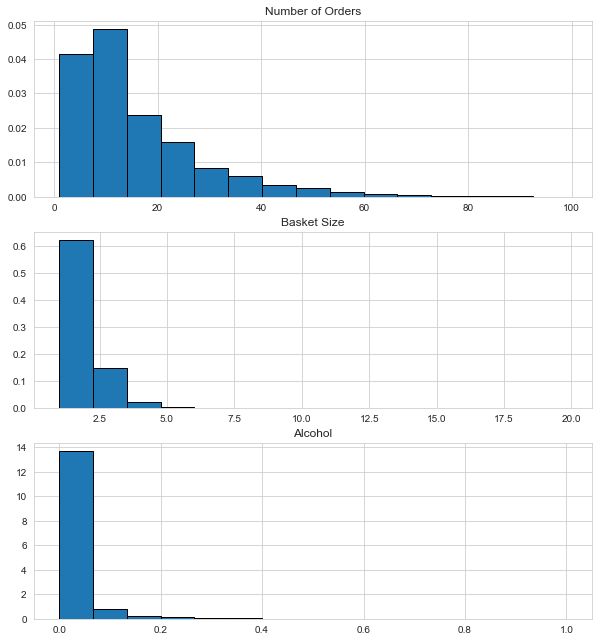

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(10, 11))

ax[0].hist(
    user_df['num_orders'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[0].set_title('Number of Orders')

ax[1].hist(
    user_df['basket_size'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[1].set_title('Basket Size')

ax[2].hist(
    user_df['alcohol'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[2].set_title('Alcohol')

plt.show()

In [35]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])
user_df_scaled.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,num_orders,basket_size
user_id,,,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.0,0.375,0.0,0.0625,0.0,0.0,0.000000,0.0625,0.000000,0.062500,0.125000,0.0,0.0,0.312500,0.0,0.000000,0.0,0.0,0.000000,0.0,0.061224,0.068323
3,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.454545,0.0,0.181818,0.0,0.0,0.363636,0.0,0.071429,0.019928
7,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.090909,0.0000,0.000000,0.090909,0.181818,0.0,0.0,0.454545,0.0,0.181818,0.0,0.0,0.000000,0.0,0.071429,0.019928
13,0.000000,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.333333,0.000000,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.020408,0.000000
17,0.148148,0.0,0.000,0.0,0.0000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.481481,0.0,0.0,0.185185,0.0,0.000000,0.0,0.0,0.185185,0.0,0.173469,0.026570


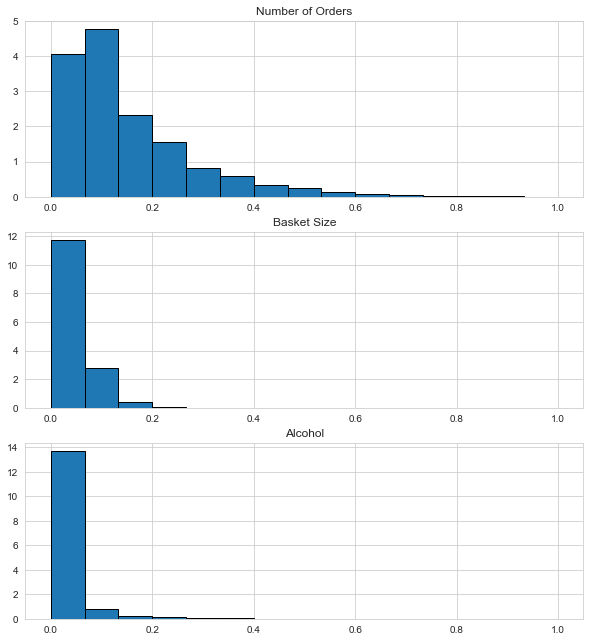

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(10, 11))

ax[0].hist(
    user_df_scaled['num_orders'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[0].set_title('Number of Orders')

ax[1].hist(
    user_df_scaled['basket_size'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[1].set_title('Basket Size')

ax[2].hist(
    user_df_scaled['alcohol'],
    bins=15,
    density=True,
    edgecolor='k',
)
ax[2].set_title('Alcohol')

plt.show()

## PCA

We have a lot of features. In such cases, it is common to apply some dimensionality reduction technique to the data. We apply Principal Components Analysis. From https://en.wikipedia.org/wiki/Principal_component_analysis:
>The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i-1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.
>
>PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i$-th principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.
>
>From either objective, it can be shown that the principal components are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix. PCA is the simplest of the true eigenvector-based multivariate analyses and is closely related to factor analysis. Factor analysis typically incorporates more domain specific assumptions about the underlying structure and solves eigenvectors of a slightly different matrix. PCA is also related to canonical correlation analysis (CCA). CCA defines coordinate systems that optimally describe the cross-covariance between two datasets while PCA defines a new orthogonal coordinate system that optimally describes variance in a single dataset. Robust and L1-norm-based variants of standard PCA have also been proposed.

In [37]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 8, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
pca.explained_variance_ratio_

array([0.23305484, 0.16864255, 0.09927618, 0.08602977, 0.06811954,
       0.06144661, 0.04129228, 0.03769175])

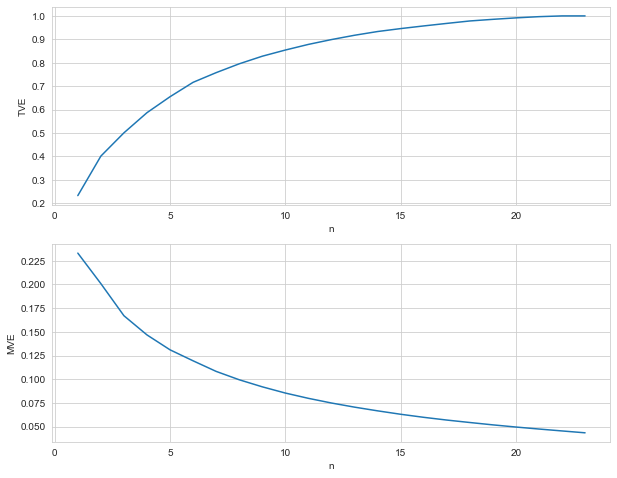

In [38]:
pca_results = {}
for n in range(1, len(features)+1):
    pca = PCA(n_components = n, random_state=0)
    pca_data = pca.fit_transform(user_df_scaled)
    pca_results[n] = {
        'sum': pca.explained_variance_ratio_.sum(),
        'mean': pca.explained_variance_ratio_.mean(),
    }
    
pca_results = pd.DataFrame().from_dict(pca_results, orient='index')
pca_results = pca_results.reset_index()
pca_results.columns = ['n', 'TVE', 'MVE']

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.lineplot(
    x='n',
    y='TVE',
    data=pca_results,
    ax=ax[0]
)

sns.lineplot(
    x='n',
    y='MVE',
    data=pca_results,
    ax=ax[1]
)

plt.show()

In [39]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
pca.explained_variance_ratio_.sum()

0.6551228821099094

In [40]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2', 'pc3', 'pc4', 'pc5']] = pca_data
pca.explained_variance_ratio_

array([0.23305484, 0.16864255, 0.09927618, 0.08602977, 0.06811954])

## KMeans

We will use KMeans to cluster the data. From https://en.wikipedia.org/wiki/K-means_clustering:
>k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

The following code block runs another simple experiment to help us determine the number of clusters

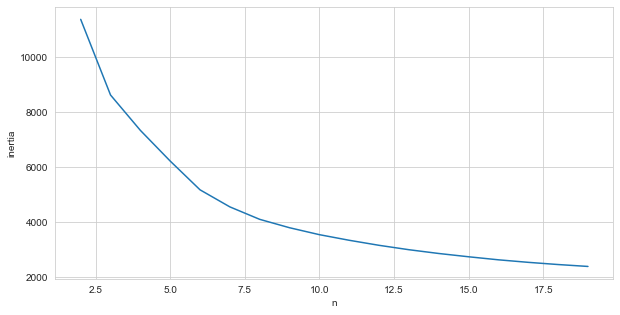

In [41]:
inertia_results = {}
for n in range(2, 20):

    model = KMeans(n_clusters=n, random_state=0)
    model.fit(user_df_scaled[['pc1', 'pc2', 'pc3', 'pc4', 'pc5']])
    inertia_results[n] = model.inertia_
    
inertia_results = pd.DataFrame().from_dict(inertia_results, orient='index')
inertia_results = inertia_results.reset_index()
inertia_results.columns = ['n', 'inertia']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(
    x='n',
    y='inertia',
    data=inertia_results,
)

plt.show()

In [79]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']] = pca_data

kmodel = KMeans(n_clusters=7, random_state=0)
kmodel.fit(user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']])
user_df_scaled['cluster'] = kmodel.labels_

In [80]:
user_df_scaled

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,num_orders,basket_size,pc1,pc2,pc3,pc4,pc5,cluster
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.0,0.375000,0.000000,0.062500,0.0,0.000000,0.000000,0.062500,0.000000,0.062500,0.125000,0.000000,0.000000,0.312500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.061224,0.068323,-0.067912,0.268612,-0.091891,-0.044983,-0.063663,5
3,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.0,0.363636,0.000000,0.071429,0.019928,0.244389,0.044021,-0.037410,0.061218,0.210791,4
7,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,0.000000,0.090909,0.181818,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.0,0.000000,0.000000,0.071429,0.019928,0.211755,-0.032785,-0.073253,-0.086436,-0.031778,4
13,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.020408,0.000000,-0.230440,-0.303830,-0.446220,-0.282763,0.025056,2
17,0.148148,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.481481,0.000000,0.000000,0.185185,0.000000,0.000000,0.000000,0.0,0.185185,0.000000,0.173469,0.026570,-0.042245,-0.170966,-0.311285,-0.231200,0.049188,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206201,0.041667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,0.062500,0.000000,0.125000,0.000000,0.062500,0.291667,0.145833,0.000000,0.020833,0.0,0.125000,0.062500,0.234694,0.053140,0.085616,-0.068624,-0.027061,-0.028233,0.086949,4
206202,0.000000,0.0,0.000000,0.000000,0.846154,0.0,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.122449,0.053140,-0.137323,-0.111160,0.021580,0.060251,0.258302,1
206206,0.000000,0.0,0.269231,0.000000,0.000000,0.0,0.000000,0.269231,0.000000,0.000000,0.000000,0.153846,0.038462,0.000000,0.115385,0.115385,0.000000,0.000000,0.0,0.038462,0.000000,0.122449,0.053140,-0.211868,0.030676,0.100137,-0.145097,-0.077922,0


In [44]:
cluster_means = user_df_scaled.groupby('cluster').mean().T
cluster_means = cluster_means.drop(['pc1','pc2','pc3','pc4','pc5'])

## 5 Clusters, 5 Dimensions

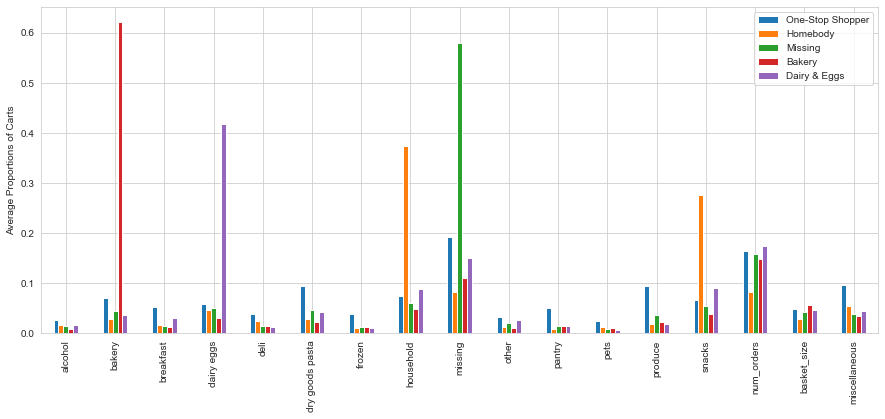

In [319]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']] = pca_data

kmodel = KMeans(n_clusters=5, random_state=0)
kmodel.fit(user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']])
user_df_scaled['cluster'] = kmodel.labels_

cluster_means1 = user_df_scaled.groupby('cluster').mean().copy()
cluster_means = user_df_scaled.groupby('cluster').mean()
cluster_means['miscellaneous'] = cluster_means['babies']+cluster_means['bulk']+cluster_means['canned goods']+cluster_means['personal care']+cluster_means['beverages']+cluster_means['international']+cluster_means['meat seafood']
cluster_means = cluster_means.T
cluster_means = cluster_means.drop(['pc1','pc2','pc3','pc4','pc5','babies','bulk','canned goods','personal care','beverages','international','meat seafood'])

g3 = cluster_means.plot(kind="bar",figsize=(15,6))
g3.set_ylabel("Average Proportions of Carts",)
g3.legend(labels=['One-Stop Shopper', 'Homebody','Missing','Bakery','Dairy & Eggs'])
plt.show()

In [293]:
cluster_means1['miscellaneous'] = cluster_means1['babies']+cluster_means1['bulk']+cluster_means1['canned goods']+cluster_means1['personal care']+cluster_means1['beverages']+cluster_means1['international']+cluster_means1['meat seafood']

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,num_orders,basket_size,pc1,pc2,pc3,pc4,pc5,miscellaneous
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.026141,0.010330,0.069598,0.016756,0.051286,0.004771,0.009359,0.057076,0.036804,0.093933,0.037554,0.073814,0.021458,0.015110,0.192118,0.031804,0.050361,0.017936,0.024289,0.094472,0.065028,0.163775,0.048480,-0.033640,-0.036076,-0.009862,0.026728,0.112454,0.095720
1,0.015703,0.005911,0.028574,0.007862,0.014848,0.006358,0.005032,0.045542,0.023937,0.028807,0.008934,0.372466,0.014697,0.004265,0.081149,0.012789,0.008370,0.010519,0.012165,0.016837,0.275235,0.081796,0.027907,-0.167681,-0.234436,-0.244433,0.030900,-0.122705,0.054645
2,0.014211,0.003734,0.044688,0.007039,0.013276,0.002072,0.004576,0.049014,0.013325,0.046430,0.011518,0.059477,0.007113,0.007000,0.579872,0.019132,0.013638,0.006201,0.007874,0.036036,0.053774,0.157870,0.042392,0.321055,0.083222,-0.015589,0.001209,-0.033633,0.037735
3,0.006868,0.005648,0.620469,0.003798,0.012632,0.001849,0.003060,0.028846,0.013382,0.022628,0.011003,0.048390,0.009284,0.002968,0.110071,0.008863,0.014642,0.006450,0.010365,0.021702,0.037082,0.146950,0.056289,-0.346401,0.411345,0.003268,-0.009837,-0.057162,0.033058
4,0.016017,0.004647,0.036580,0.010265,0.029177,0.002852,0.007105,0.418105,0.012274,0.041959,0.010645,0.088458,0.009008,0.005751,0.149448,0.024950,0.014389,0.004325,0.006210,0.017663,0.090174,0.173571,0.046357,-0.088384,-0.195000,0.246158,-0.087530,-0.083860,0.043952


In [294]:
cluster_means1 = cluster_means1.T
cluster_means1 = cluster_means1.drop(['pc1','pc2','pc3','pc4','pc5','babies','bulk','canned goods','personal care','beverages','international','meat seafood', 'num_orders', 'basket_size'])

In [295]:
cluster_0 = cluster_means1.drop(columns=[1,2,3,4])
cluster_1 = cluster_means1.drop(columns=[0,2,3,4])
cluster_2 = cluster_means1.drop(columns=[1,0,3,4])
cluster_3 = cluster_means1.drop(columns=[1,2,0,4])
cluster_4 = cluster_means1.drop(columns=[1,2,3,0])

In [296]:
cluster_0[0]

alcohol            0.026141
bakery             0.069598
breakfast          0.051286
dairy eggs         0.057076
deli               0.036804
dry goods pasta    0.093933
frozen             0.037554
household          0.073814
missing            0.192118
other              0.031804
pantry             0.050361
pets               0.024289
produce            0.094472
snacks             0.065028
miscellaneous      0.095720
Name: 0, dtype: float64

In [297]:
cluster_0test = cluster_0 / cluster_0.sum()
cluster_0test

cluster,0
alcohol,0.026141
bakery,0.069598
breakfast,0.051286
dairy eggs,0.057076
deli,0.036804
dry goods pasta,0.093933
frozen,0.037554
household,0.073814
missing,0.192118
other,0.031804


In [298]:
names=list(cluster_0.index)

In [299]:
names

['alcohol',
 'bakery',
 'breakfast',
 'dairy eggs',
 'deli',
 'dry goods pasta',
 'frozen',
 'household',
 'missing',
 'other',
 'pantry',
 'pets',
 'produce',
 'snacks',
 'miscellaneous']

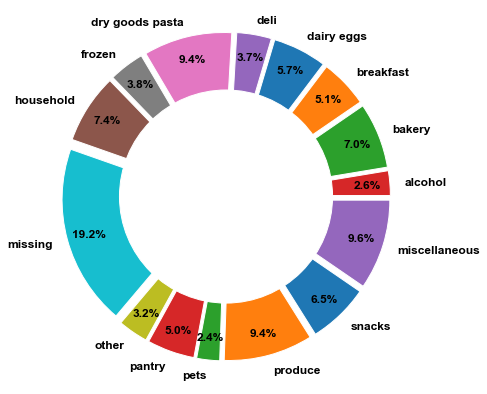

In [300]:
explode = (.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,)
plt.figure(figsize=(7,7))
plt.pie(cluster_0[0],
        explode=explode,
        labels = names,
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        pctdistance=.85,
        colors = ['tab:red','tab:green','tab:orange','tab:blue','tab:purple','tab:pink','tab:gray','tab:brown','tab:cyan','tab:olive',],
        normalize = True
       )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

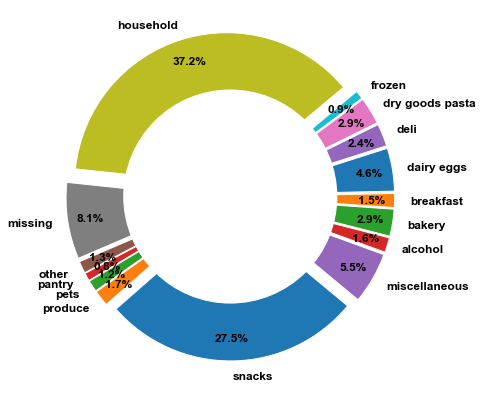

In [301]:
explode = (.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,)
plt.figure(figsize=(7,7))
plt.pie(cluster_1[1],
        explode=explode,
        labels = names,
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        pctdistance=.85,
        colors = ['tab:red','tab:green','tab:orange','tab:blue','tab:purple','tab:pink','tab:cyan','tab:olive','tab:gray','tab:brown'],
        normalize=True,
        startangle=340
       )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

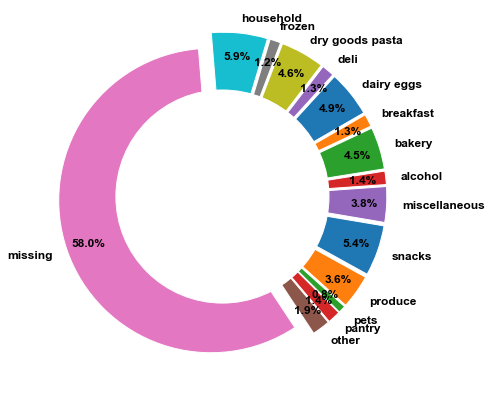

In [307]:
explode = (.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,)
plt.figure(figsize=(7,7))
plt.pie(cluster_2[2],
        explode=explode,
        labels = names,
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        pctdistance=.85,
        colors = ['tab:red','tab:green','tab:orange','tab:blue','tab:purple','tab:olive','tab:gray','tab:cyan','tab:pink','tab:brown',],
        startangle=4,
        normalize=True,
       )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

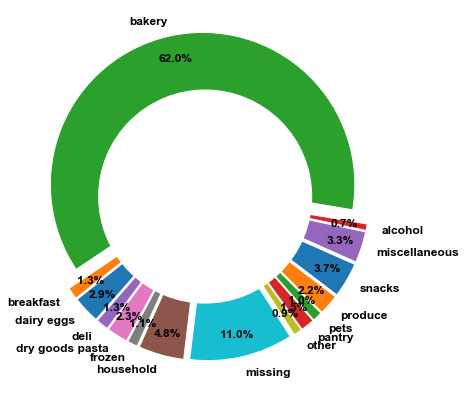

In [313]:
explode = (.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,)
plt.figure(figsize=(7,7))
plt.pie(cluster_3[3],
        explode=explode,
        labels = names,
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        pctdistance=.85,
        colors = ['tab:red','tab:green','tab:orange','tab:blue','tab:purple','tab:pink','tab:gray','tab:brown','tab:cyan','tab:olive',],
        #rotatelabels=True,
        startangle=348,
        normalize=True,
       )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

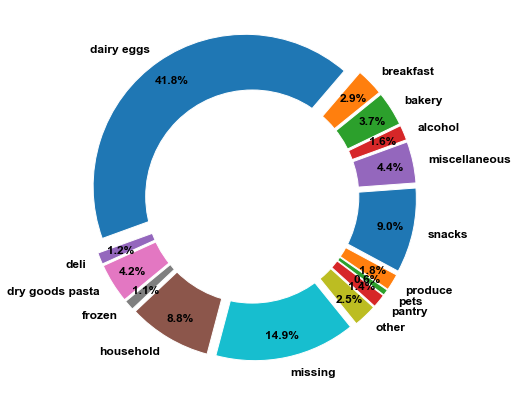

In [314]:
explode = (.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,.08,)
plt.figure(figsize=(7,7))
plt.pie(cluster_4[4],
        explode=explode,
        labels = names,
        textprops={'size': 'large', 'color':'k', 'weight':'bold'},
        autopct='%.1f%%',
        pctdistance=.85,
        colors = ['tab:red','tab:green','tab:orange','tab:blue','tab:purple','tab:pink','tab:gray','tab:brown','tab:cyan','tab:olive',],
        normalize=True,
        startangle=20
       )
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

## 6 Clusters

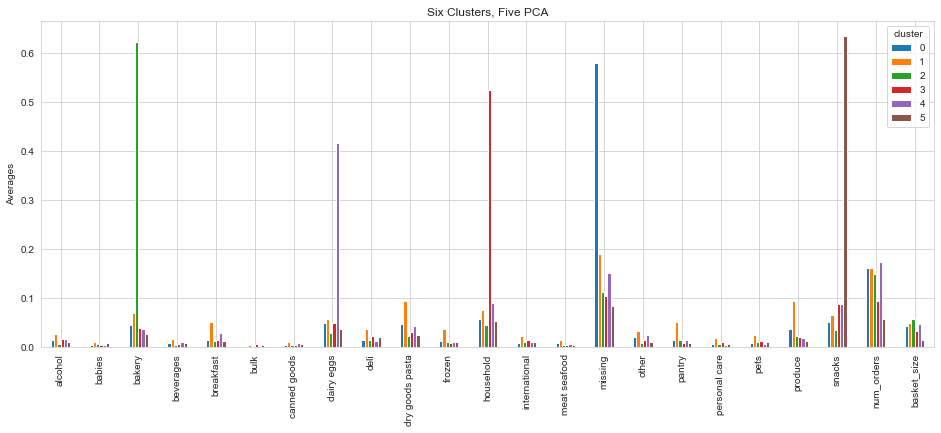

In [46]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']] = pca_data

kmodel = KMeans(n_clusters=6, random_state=0)
kmodel.fit(user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']])
user_df_scaled['cluster'] = kmodel.labels_

cluster_means = user_df_scaled.groupby('cluster').mean().T
cluster_means = cluster_means.drop(['pc1','pc2','pc3','pc4','pc5'])

g3 = cluster_means.plot(kind="bar",figsize=(16,6))
g3.set_ylabel("Averages",)
g3.set_title("Six Clusters, Five PCA")
plt.show()

## 7 Clusters, 5 Dimensions

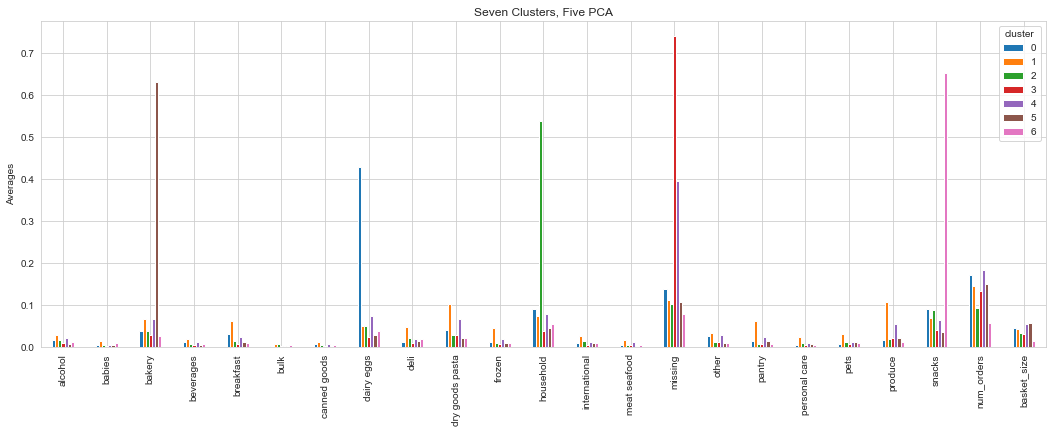

In [47]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 5, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']] = pca_data

kmodel = KMeans(n_clusters=7, random_state=0)
kmodel.fit(user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5']])
user_df_scaled['cluster'] = kmodel.labels_

cluster_means = user_df_scaled.groupby('cluster').mean().T
cluster_means = cluster_means.drop(['pc1','pc2','pc3','pc4','pc5'])

g3 = cluster_means.plot(kind="bar",figsize=(18,6))
g3.set_ylabel("Averages",)
g3.set_title("Seven Clusters, Five PCA")
plt.show()

In [231]:
print(f"{cluster_0['household'].describe()}\n\n{cluster_1['household'].describe()}")

count    10403.000000
mean         0.226954
std          0.245721
min          0.000000
25%          0.000000
50%          0.166667
75%          0.333333
max          1.000000
Name: household, dtype: float64

count    10014.000000
mean         0.054278
std          0.077613
min          0.000000
25%          0.000000
50%          0.022727
75%          0.083333
max          0.529412
Name: household, dtype: float64


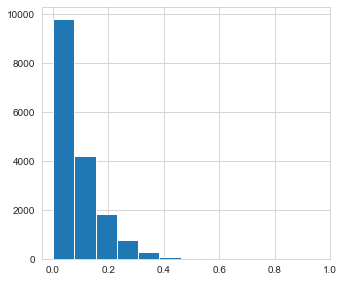

In [248]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1, 0.1, 0.4, 0.7])

ax.hist(cluster_4['household'])

ax.set_xticks([0,.2,.4,.6,.8,1])

plt.show()

In [153]:
min_max_scaler = MinMaxScaler()
user_df_scaled = user_df.copy()
user_df_scaled[['num_orders', 'basket_size']] = min_max_scaler.fit_transform(user_df_scaled[['num_orders', 'basket_size']])

pca = PCA(n_components = 7, random_state=0)
pca_data = pca.fit_transform(user_df_scaled)
user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7']] = pca_data

omodel = OPTICS(min_samples=50)
omodel.fit(user_df_scaled[['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7']])
user_df_scaled['cluster'] = omodel.labels_

C:\Users\rider\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:803: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [154]:
user_df_scaled['cluster'].unique()

array([-1,  2,  6, 12,  8, 14, 13, 15, 11, 16, 10,  9,  0,  5,  7,  4,  3,
        1])

In [155]:
user_df_scaled.shape

(49572, 31)

In [156]:
user_df_scaled[user_df_scaled['cluster']>=0].shape

(1283, 31)

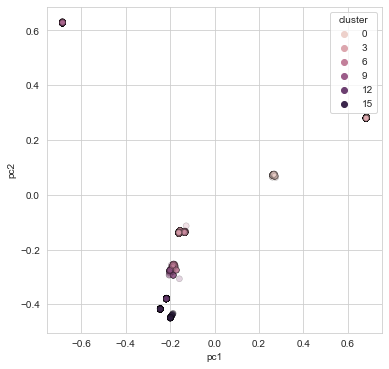

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(
    x='pc1',
    y='pc2',
    data=user_df_scaled[user_df_scaled['cluster']>=0],
    alpha=0.25,
    hue='cluster',
    edgecolor='k',
)

plt.show()

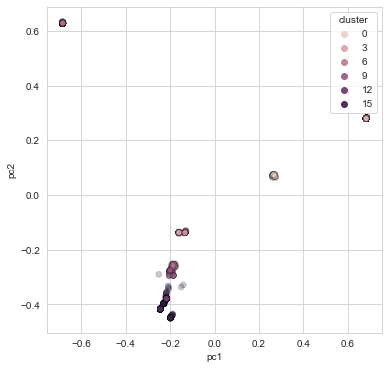

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(
    x='pc1',
    y='pc2',
    data=user_df_scaled[user_df_scaled['cluster']>=0],
    alpha=0.25,
    hue='cluster',
    edgecolor='k',
)

plt.show()

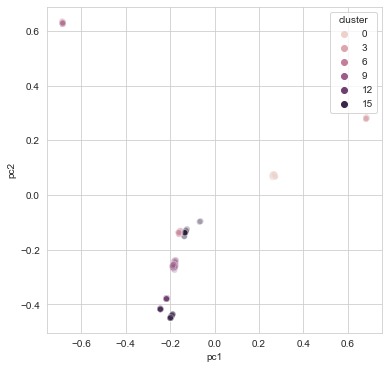

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(
    x='pc1',
    y='pc2',
    data=user_df_scaled[user_df_scaled['cluster']>=0],
    alpha=0.25,
    hue='cluster',
)

plt.show()